<a href="https://colab.research.google.com/github/sokrypton/laxy/blob/main/laxy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -qnc https://raw.githubusercontent.com/sokrypton/laxy/main/laxy.py

In [2]:
import laxy
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

# LINEAR REGRESSION

In [3]:
x = jnp.arange(10)
y = x*2.0 + 3.0

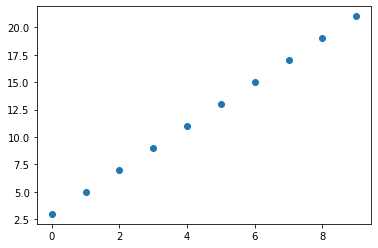

In [4]:
plt.scatter(x,y)

In [5]:
def model(params, inputs):
  out = inputs["x"] * params["m"] + params["b"]
  loss = jnp.square(inputs["y"] - out)
  return out, loss

In [6]:
inputs = {"x":x, "y":y}
params = {"m":1.0,"b":0.0}

In [7]:
opt = laxy.OPT(model, params)

In [8]:
# take one step
opt.train_on_batch(inputs)

DeviceArray(645., dtype=float32)

In [9]:
# take multiple steps
losses = opt.fit(inputs, steps=10000)

1000 97.351135
2000 11.017001
3000 6.2362614
4000 4.275578
5000 2.3379102
6000 0.9020636
7000 0.20016143
8000 0.01761132
9000 0.00031888438
10000 4.0664514e-07


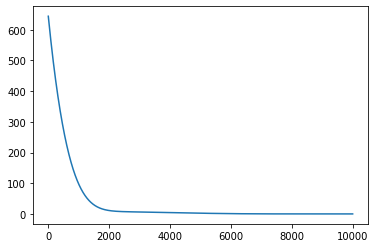

In [10]:
plt.plot(losses)

In [11]:
opt.get_params()

{'b': DeviceArray(2.9996278, dtype=float32),
 'm': DeviceArray(2.0000618, dtype=float32)}

In [12]:
opt.evaluate(inputs)

DeviceArray([1.3851155e-07, 9.6361191e-08, 6.1955689e-08, 3.4939148e-08,
             1.5607839e-08, 3.9617589e-09, 3.6379788e-12, 3.4960976e-09,
             1.4901161e-08, 3.3527613e-08], dtype=float32)

In [13]:
opt.predict(inputs)

DeviceArray([ 2.9996278,  4.9996896,  6.999751 ,  8.999813 , 10.999875 ,
             12.999937 , 14.999998 , 17.00006  , 19.000122 , 21.000183 ],            dtype=float32)

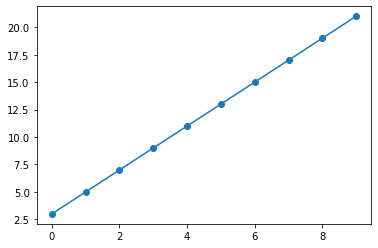

In [14]:
plt.scatter(x,y)
plt.plot(x,opt.predict(inputs))

#STAX

In [15]:
from jax.experimental import stax

In [16]:
# define NN using stax
stax_layers = stax.serial(stax.Dense(5),
                          stax.Elu,
                          stax.Dense(1))

nn_params, nn_layers = laxy.STAX(stax_layers, input_shape=(None,10))

In [17]:
params = {"nn":nn_params,
          "a":1.0}

In [18]:
def model(params, inputs):
  out = nn_layers(params["nn"], inputs["x"]) * params["a"]
  loss = jnp.square(out - inputs["y"]).sum()
  return out,loss

In [19]:
opt = laxy.OPT(model, params)

In [20]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [21]:
losses = opt.fit(inputs, steps=1000)

100 115.59007
200 101.20881
300 93.46761
400 88.323944
500 83.98041
600 79.77135
700 76.33592
800 73.680725
900 71.22797
1000 68.611786


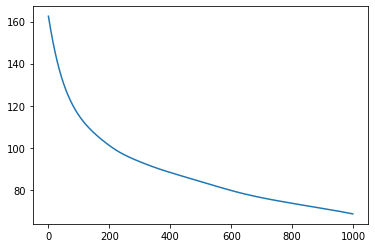

In [22]:
plt.plot(losses)

# build a NN using custom layers from laxy
custom layers include: MRF, Conv1D, Conv2D, GRU, LSTM, Dense

In [23]:
params = {"D0": laxy.Dense()(in_dims=10, out_dims=5),
          "D1": laxy.Dense()(in_dims=5, out_dims=1, use_bias=False),
          "b": 0.0}

In [24]:
def model(params, inputs):
  A = laxy.Dense(params["D0"])(inputs["x"])
  A = jax.nn.elu(A)
  out = laxy.Dense(params["D1"])(A) + params["b"]
  loss = jnp.square(out - inputs["y"]).sum()
  return out,loss

In [25]:
opt = laxy.OPT(model, params)

In [26]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [27]:
%%time
losses = opt.fit(inputs, steps=1000)

100 137.18484
200 108.735016
300 95.31731
400 87.82895
500 83.167496
600 79.45156
700 75.53054
800 71.28313
900 67.311676
1000 63.819584
CPU times: user 1.49 s, sys: 194 ms, total: 1.69 s
Wall time: 1.24 s


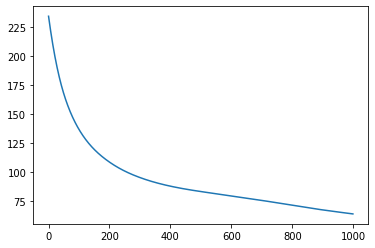

In [28]:
plt.plot(losses)